In [1]:
import numpy as np
import pandas as pd
from river import optim
from river.drift import ADWIN
from ray.tune.sklearn import TuneGridSearchCV

from sail.models.river.forest import AdaptiveRandomForestClassifier
from sail.models.river.linear_model import LogisticRegression
from sail.models.auto_ml import PipeLineSelection
from sail.pipeline import SAILPipeline
from sklearn.impute import SimpleImputer
from sail.transfomers.river.preprocessing import StandardScaler

#### Load Data

In [2]:
df = pd.read_csv("/Users/dhaval/Projects/Datasets/agrawal.csv").head(50000)
X = df.copy()

y = X["class"]
X.drop("class", axis=1, inplace=True)


#### Model Definition

In [3]:
logistic_reg = LogisticRegression(optimizer=optim.SGD(0.1))
random_forest = AdaptiveRandomForestClassifier(n_models=10)

#### Create SAIL Pipeline

In [4]:
steps = [
    ("Imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
    ("standard_scalar", StandardScaler()),
    ("classifier", "passthrough"),
]
sail_pipeline = SAILPipeline(steps=steps)

[2023-05-11 22:54:30:665] - INFO - SAIL : created SAILPipeline object with ID 61208b7b-a181-4ae7-b6ae-6fba11e7fb27


#### HPO Params

In [5]:
param_grid = [
    {
        "classifier": [logistic_reg],
        "classifier__l2": [0.1, 0.9],
        "classifier__intercept_init": [0.2, 0.5],
    },
    {
        "classifier": [random_forest],
        "classifier__n_models": [5, 10],
        "Imputer": ["passthrough"],
    },
]

#### Create Model Instance

In [6]:
pipeline_selection = PipeLineSelection(
    pipeline=sail_pipeline,
    pipeline_params_grid=param_grid,
    search_data_size=1000,
    search_method=TuneGridSearchCV,
    search_method_params={
        "max_iters": 1,
        "early_stopping": False,
        "mode": "max",
        "scoring": "accuracy",
        "pipeline_auto_early_stop": False,
    },
    drift_detector=ADWIN(delta=0.001),
)

#### Start Training

In [8]:
y_preds = []
y_true = []
batch_size = 50

start = 0
for end in range(50, 20001, batch_size):

    X_train = X.iloc[start:end]
    y_train = y.iloc[start:end]

    if end > 1000: # search_data_size is 1000
        preds = pipeline_selection.predict(X_train)
        y_preds.extend(list(preds))
        y_true.extend(list(y_train))

    pipeline_selection.partial_fit(X_train, y_train)
    start = end

2023-05-11 22:56:40,587	WARNING searcher.py:372 -- save not implemented for Searcher. Skipping save.
(_Trainable pid=28023) [2023-05-11 22:56:46:292] - INFO - SAIL : created SAILPipeline object with ID b711e480-15ba-460e-bca9-e7e43289f23e
(_Trainable pid=28023) [2023-05-11 22:56:46:294] - INFO - SAIL : created SAILPipeline object with ID 72519ae6-3d6d-466b-b805-bfc91578f393
(_Trainable pid=28023) [2023-05-11 22:56:46:295] - INFO - SAIL : created SAILPipeline object with ID e52dda04-296a-4fc0-b7bd-7a6b2d4f918c
(_Trainable pid=28023) [2023-05-11 22:56:46:297] - INFO - SAIL : created SAILPipeline object with ID bc153039-8126-49c0-8f30-c4fe6ccaf178
(_Trainable pid=28023) [2023-05-11 22:56:46:298] - INFO - SAIL : created SAILPipeline object with ID 5dda7293-4253-4d04-aa71-e09fb78975d0
(_Trainable pid=28023) [2023-05-11 22:56:46:312] - INFO - SAIL : created SAILPipeline object with ID c49bace6-9918-4a73-9959-f3cf96142da9
(_Trainable pid=28024) [2023-05-11 22:56:46:314] - INFO - SAIL : create

(_Trainable pid=28023) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
(_Trainable pid=28024) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
(_Trainable pid=28025) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
(_Trainable pid=28023) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
(_Trainable pid=28023) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
(_Trainable pid=28026) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
(_Trainable pid=28026) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
(_Trainable pid=28024) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
(_Trainable pid=28024) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
(_Trainable pid=28025) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
(_Trainable pid=28025) [Pipeline] ........ (step 3 of 3) Pro

(_Trainable pid=28023) [2023-05-11 22:56:46:466] - INFO - SAIL : created SAILPipeline object with ID 363e4349-9884-44f5-bbbb-8e0a00096a68
(_Trainable pid=28023) [2023-05-11 22:56:46:533] - INFO - SAIL : created SAILPipeline object with ID c0904e7d-9bf3-4cba-bf37-c3b4fdc7fa73
(_Trainable pid=28024) [2023-05-11 22:56:46:479] - INFO - SAIL : created SAILPipeline object with ID a82d1ea8-e661-49ee-8768-ad591b48cbc2
(_Trainable pid=28024) [2023-05-11 22:56:46:551] - INFO - SAIL : created SAILPipeline object with ID 797c42fd-89cb-471d-9ab4-db9816f82a9a
(_Trainable pid=28026) [2023-05-11 22:56:46:451] - INFO - SAIL : created SAILPipeline object with ID 0716ff35-428d-4c1f-9fd7-db8c08d33c30
(_Trainable pid=28026) [2023-05-11 22:56:46:515] - INFO - SAIL : created SAILPipeline object with ID df01b28c-b671-4726-ba7c-0c6b5775b658
(_Trainable pid=28025) [2023-05-11 22:56:46:460] - INFO - SAIL : created SAILPipeline object with ID 3e7c88ec-34cd-4e2d-bfa1-55874781b242
(_Trainable pid=28025) [2023-05-11

(_Trainable pid=28023) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
(_Trainable pid=28026) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
(_Trainable pid=28024) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
(_Trainable pid=28025) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
(_Trainable pid=28023) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
(_Trainable pid=28026) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
(_Trainable pid=28024) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
(_Trainable pid=28025) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


2023-05-11 22:56:46,931	INFO tensorboardx.py:267 -- Removed the following hyperparameter values when logging to tensorboard: {'classifier': LogisticRegression(initializer=Zeros (),
                   intercept_lr=Constant({'learning_rate': 0.01}),
                   loss=Log({'weight_pos': 1.0, 'weight_neg': 1.0}),
                   optimizer=SGD({'lr': Constant({'learning_rate': 0.1}), 'n_iterations': 0}))}
2023-05-11 22:56:46,965	INFO tensorboardx.py:267 -- Removed the following hyperparameter values when logging to tensorboard: {'classifier': LogisticRegression(initializer=Zeros (),
                   intercept_lr=Constant({'learning_rate': 0.01}),
                   loss=Log({'weight_pos': 1.0, 'weight_neg': 1.0}),
                   optimizer=SGD({'lr': Constant({'learning_rate': 0.1}), 'n_iterations': 0}))}


(_Trainable pid=28026) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
(_Trainable pid=28030) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   1.2s


(_Trainable pid=28030) [2023-05-11 22:56:47:708] - INFO - SAIL : created SAILPipeline object with ID 1bc9a59c-7c20-4f65-af0d-4c9f07721ed1


(_Trainable pid=28030) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.7s
(_Trainable pid=28031) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   1.9s


(_Trainable pid=28031) [2023-05-11 22:56:48:490] - INFO - SAIL : created SAILPipeline object with ID d093d7fe-e90b-441f-bd8e-c6af9b01d83e
(_Trainable pid=28030) [2023-05-11 22:56:48:460] - INFO - SAIL : created SAILPipeline object with ID 0ed61416-b3f9-402d-94ff-99e146660c4b


(_Trainable pid=28030) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.7s


(_Trainable pid=28030) [2023-05-11 22:56:49:206] - INFO - SAIL : created SAILPipeline object with ID 690b9028-4b6e-4856-bc06-1ff5932fbab1


(_Trainable pid=28031) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   1.4s
(_Trainable pid=28030) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.7s


(_Trainable pid=28031) [2023-05-11 22:56:49:989] - INFO - SAIL : created SAILPipeline object with ID 6c6f952d-16f7-4771-bf30-18ffb5eeae7e
(_Trainable pid=28030) [2023-05-11 22:56:49:988] - INFO - SAIL : created SAILPipeline object with ID 797cdbd2-7f38-4daa-9f54-a494f66a401e
2023-05-11 22:56:50,825	INFO tensorboardx.py:267 -- Removed the following hyperparameter values when logging to tensorboard: {'classifier': AdaptiveRandomForestClassifier()}


(_Trainable pid=28030) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.8s
(_Trainable pid=28031) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   1.4s


(_Trainable pid=28031) [2023-05-11 22:56:51:501] - INFO - SAIL : created SAILPipeline object with ID 2ff8c520-84e6-4b3e-b882-ebfcb5fc3174


(_Trainable pid=28031) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   1.4s


(_Trainable pid=28031) [2023-05-11 22:56:52:946] - INFO - SAIL : created SAILPipeline object with ID d48648b8-3620-4343-a088-d858455d12a4
2023-05-11 22:56:54,566	INFO tensorboardx.py:267 -- Removed the following hyperparameter values when logging to tensorboard: {'classifier': AdaptiveRandomForestClassifier()}
[2023-05-11 22:56:54:650] - INFO - SAIL : created SAILPipeline object with ID 3c2225dc-48ff-4ab2-a6b6-74c104435d04
[2023-05-11 22:56:54:654] - INFO - SAIL : created SAILPipeline object with ID d5c6af15-34e9-4056-9e8a-2bae085472b5


(_Trainable pid=28031) [Pipeline] ........ (step 3 of 3) Processing classifier, total=   1.5s


[2023-05-11 22:56:55:577] - INFO - SAIL : Cumulative Pipeline Score: 0.9
[2023-05-11 22:56:55:579] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:55:637] - INFO - SAIL : Cumulative Pipeline Score: 0.88
[2023-05-11 22:56:55:638] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:55:713] - INFO - SAIL : Cumulative Pipeline Score: 0.8866666666666667
[2023-05-11 22:56:55:714] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.9s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:56:55:780] - INFO - SAIL : Cumulative Pipeline Score: 0.895
[2023-05-11 22:56:55:782] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:55:854] - INFO - SAIL : Cumulative Pipeline Score: 0.9
[2023-05-11 22:56:55:855] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:55:921] - INFO - SAIL : Cumulative Pipeline Score: 0.9033333333333333
[2023-05-11 22:56:55:921] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:55:982] - INFO - SAIL : Cumulative Pipeline Score: 0.9114285714285715
[2023-05-11 22:56:55:984] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:56:44] - INFO - SAIL : Cumulative Pipeline Score: 0.91
[2023-05-11 22:56:56:45] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:56:56:110] - INFO - SAIL : Cumulative Pipeline Score: 0.9111111111111111
[2023-05-11 22:56:56:111] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:56:178] - INFO - SAIL : Cumulative Pipeline Score: 0.918
[2023-05-11 22:56:56:179] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:56:266] - INFO - SAIL : Cumulative Pipeline Score: 0.9163636363636364
[2023-05-11 22:56:56:270] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:56:56:423] - INFO - SAIL : Cumulative Pipeline Score: 0.9216666666666666
[2023-05-11 22:56:56:425] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:56:542] - INFO - SAIL : Cumulative Pipeline Score: 0.916923076923077
[2023-05-11 22:56:56:544] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:56:56:639] - INFO - SAIL : Cumulative Pipeline Score: 0.92
[2023-05-11 22:56:56:640] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:56:721] - INFO - SAIL : Cumulative Pipeline Score: 0.916
[2023-05-11 22:56:56:722] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:56:810] - INFO - SAIL : Cumulative Pipeline Score: 0.91625
[2023-05-11 22:56:56:811] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:56:56:890] - INFO - SAIL : Cumulative Pipeline Score: 0.9188235294117647
[2023-05-11 22:56:56:891] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:56:968] - INFO - SAIL : Cumulative Pipeline Score: 0.9211111111111111
[2023-05-11 22:56:56:969] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:57:50] - INFO - SAIL : Cumulative Pipeline Score: 0.92
[2023-05-11 22:56:57:51] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:56:57:138] - INFO - SAIL : Cumulative Pipeline Score: 0.918
[2023-05-11 22:56:57:139] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:57:235] - INFO - SAIL : Cumulative Pipeline Score: 0.9180952380952381
[2023-05-11 22:56:57:236] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:56:57:334] - INFO - SAIL : Cumulative Pipeline Score: 0.92
[2023-05-11 22:56:57:336] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:57:429] - INFO - SAIL : Cumulative Pipeline Score: 0.9182608695652174
[2023-05-11 22:56:57:430] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:57:507] - INFO - SAIL : Cumulative Pipeline Score: 0.9191666666666667
[2023-05-11 22:56:57:508] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:57:587] - INFO - SAIL : Cumulative Pipeline Score: 0.92
[2023-05-11 22:56:57:588] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:56:57:667] - INFO - SAIL : Cumulative Pipeline Score: 0.9192307692307692
[2023-05-11 22:56:57:668] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:57:747] - INFO - SAIL : Cumulative Pipeline Score: 0.92
[2023-05-11 22:56:57:748] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:57:825] - INFO - SAIL : Cumulative Pipeline Score: 0.92
[2023-05-11 22:56:57:825] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:56:57:900] - INFO - SAIL : Cumulative Pipeline Score: 0.9213793103448276
[2023-05-11 22:56:57:901] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:57:974] - INFO - SAIL : Cumulative Pipeline Score: 0.922
[2023-05-11 22:56:57:976] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:58:39] - INFO - SAIL : Cumulative Pipeline Score: 0.9238709677419354
[2023-05-11 22:56:58:40] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:56:58:108] - INFO - SAIL : Cumulative Pipeline Score: 0.924375
[2023-05-11 22:56:58:109] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:58:180] - INFO - SAIL : Cumulative Pipeline Score: 0.926060606060606
[2023-05-11 22:56:58:181] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:58:248] - INFO - SAIL : Cumulative Pipeline Score: 0.9258823529411765
[2023-05-11 22:56:58:249] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:56:58:322] - INFO - SAIL : Cumulative Pipeline Score: 0.9262857142857143
[2023-05-11 22:56:58:348] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:58:439] - INFO - SAIL : Cumulative Pipeline Score: 0.9266666666666666
[2023-05-11 22:56:58:440] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:56:58:524] - INFO - SAIL : Cumulative Pipeline Score: 0.9264864864864865
[2023-05-11 22:56:58:525] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:58:610] - INFO - SAIL : Cumulative Pipeline Score: 0.9263157894736842
[2023-05-11 22:56:58:611] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:58:683] - INFO - SAIL : Cumulative Pipeline Score: 0.9266666666666666
[2023-05-11 22:56:58:684] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:58:755] - INFO - SAIL : Cumulative Pipeline Score: 0.926
[2023-05-11 22:56:58:757] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:56:58:828] - INFO - SAIL : Cumulative Pipeline Score: 0.9278048780487805
[2023-05-11 22:56:58:829] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:58:907] - INFO - SAIL : Cumulative Pipeline Score: 0.9266666666666666
[2023-05-11 22:56:58:908] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:59:18] - INFO - SAIL : Cumulative Pipeline Score: 0.9279069767441861


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:56:59:19] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:59:95] - INFO - SAIL : Cumulative Pipeline Score: 0.9281818181818182
[2023-05-11 22:56:59:96] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:59:169] - INFO - SAIL : Cumulative Pipeline Score: 0.9271111111111111
[2023-05-11 22:56:59:170] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:59:239] - INFO - SAIL : Cumulative Pipeline Score: 0.9269565217391305
[2023-05-11 22:56:59:239] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:56:59:311] - INFO - SAIL : Cumulative Pipeline Score: 0.9263829787234042
[2023-05-11 22:56:59:312] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:59:383] - INFO - SAIL : Cumulative Pipeline Score: 0.9266666666666666
[2023-05-11 22:56:59:384] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:59:457] - INFO - SAIL : Cumulative Pipeline Score: 0.9269387755102041
[2023-05-11 22:56:59:458] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:56:59:541] - INFO - SAIL : Cumulative Pipeline Score: 0.9252
[2023-05-11 22:56:59:541] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:59:621] - INFO - SAIL : Cumulative Pipeline Score: 0.9258823529411765
[2023-05-11 22:56:59:622] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:59:694] - INFO - SAIL : Cumulative Pipeline Score: 0.9265384615384615
[2023-05-11 22:56:59:696] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:56:59:774] - INFO - SAIL : Cumulative Pipeline Score: 0.9267924528301886
[2023-05-11 22:56:59:775] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:59:845] - INFO - SAIL : Cumulative Pipeline Score: 0.9262962962962963
[2023-05-11 22:56:59:845] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:56:59:925] - INFO - SAIL : Cumulative Pipeline Score: 0.9261818181818182
[2023-05-11 22:56:59:926] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:00:3] - INFO - SAIL : Cumulative Pipeline Score: 0.9264285714285714
[2023-05-11 22:57:00:4] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:00:79] - INFO - SAIL : Cumulative Pipeline Score: 0.9273684210526316
[2023-05-11 22:57:00:80] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:00:156] - INFO - SAIL : Cumulative Pipeline Score: 0.9272413793103448
[2023-05-11 22:57:00:157] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:00:241] - INFO - SAIL : Cumulative Pipeline Score: 0.9271186440677966
[2023-05-11 22:57:00:242] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:00:333] - INFO - SAIL : Cumulative Pipeline Score: 0.927
[2023-05-11 22:57:00:335] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:00:530] - INFO - SAIL : Cumulative Pipeline Score: 0.9281967213114755
[2023-05-11 22:57:00:531] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:00:613] - INFO - SAIL : Cumulative Pipeline Score: 0.9293548387096774
[2023-05-11 22:57:00:615] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.2s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:00:716] - INFO - SAIL : Cumulative Pipeline Score: 0.9298412698412698
[2023-05-11 22:57:00:718] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:00:814] - INFO - SAIL : Cumulative Pipeline Score: 0.930625
[2023-05-11 22:57:00:816] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:00:919] - INFO - SAIL : Cumulative Pipeline Score: 0.9301538461538461
[2023-05-11 22:57:00:921] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:01:1] - INFO - SAIL : Cumulative Pipeline Score: 0.9309090909090909
[2023-05-11 22:57:01:2] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:01:75] - INFO - SAIL : Cumulative Pipeline Score: 0.9316417910447761
[2023-05-11 22:57:01:76] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:01:145] - INFO - SAIL : Cumulative Pipeline Score: 0.9317647058823529
[2023-05-11 22:57:01:145] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:01:216] - INFO - SAIL : Cumulative Pipeline Score: 0.9318840579710145
[2023-05-11 22:57:01:217] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:01:310] - INFO - SAIL : Cumulative Pipeline Score: 0.932
[2023-05-11 22:57:01:311] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:01:421] - INFO - SAIL : Cumulative Pipeline Score: 0.9307042253521127
[2023-05-11 22:57:01:423] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:01:513] - INFO - SAIL : Cumulative Pipeline Score: 0.9308333333333333
[2023-05-11 22:57:01:514] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:01:586] - INFO - SAIL : Cumulative Pipeline Score: 0.9315068493150684
[2023-05-11 22:57:01:587] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:01:670] - INFO - SAIL : Cumulative Pipeline Score: 0.9316216216216217
[2023-05-11 22:57:01:672] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:01:763] - INFO - SAIL : Cumulative Pipeline Score: 0.9314666666666667
[2023-05-11 22:57:01:765] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:01:867] - INFO - SAIL : Cumulative Pipeline Score: 0.9318421052631579
[2023-05-11 22:57:01:868] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:01:934] - INFO - SAIL : Cumulative Pipeline Score: 0.9314285714285714
[2023-05-11 22:57:01:935] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:02:5] - INFO - SAIL : Cumulative Pipeline Score: 0.9317948717948717
[2023-05-11 22:57:02:6] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:02:78] - INFO - SAIL : Cumulative Pipeline Score: 0.9321518987341773
[2023-05-11 22:57:02:79] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:02:149] - INFO - SAIL : Cumulative Pipeline Score: 0.9325
[2023-05-11 22:57:02:150] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:02:224] - INFO - SAIL : Cumulative Pipeline Score: 0.9333333333333333
[2023-05-11 22:57:02:225] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:02:297] - INFO - SAIL : Cumulative Pipeline Score: 0.9336585365853659
[2023-05-11 22:57:02:298] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:02:386] - INFO - SAIL : Cumulative Pipeline Score: 0.9332530120481928
[2023-05-11 22:57:02:387] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:02:469] - INFO - SAIL : Cumulative Pipeline Score: 0.9330952380952381
[2023-05-11 22:57:02:471] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:02:553] - INFO - SAIL : Cumulative Pipeline Score: 0.9334117647058824
[2023-05-11 22:57:02:554] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:02:629] - INFO - SAIL : Cumulative Pipeline Score: 0.9334883720930233
[2023-05-11 22:57:02:631] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:02:716] - INFO - SAIL : Cumulative Pipeline Score: 0.9333333333333333
[2023-05-11 22:57:02:716] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:02:808] - INFO - SAIL : Cumulative Pipeline Score: 0.9331818181818182
[2023-05-11 22:57:02:809] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:02:885] - INFO - SAIL : Cumulative Pipeline Score: 0.9337078651685393
[2023-05-11 22:57:02:886] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:02:962] - INFO - SAIL : Cumulative Pipeline Score: 0.9342222222222222
[2023-05-11 22:57:02:963] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:03:42] - INFO - SAIL : Cumulative Pipeline Score: 0.9345054945054945
[2023-05-11 22:57:03:44] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:03:118] - INFO - SAIL : Cumulative Pipeline Score: 0.9339130434782609
[2023-05-11 22:57:03:119] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:03:201] - INFO - SAIL : Cumulative Pipeline Score: 0.933763440860215
[2023-05-11 22:57:03:202] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:03:274] - INFO - SAIL : Cumulative Pipeline Score: 0.9338297872340425
[2023-05-11 22:57:03:275] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:03:341] - INFO - SAIL : Cumulative Pipeline Score: 0.9334736842105263
[2023-05-11 22:57:03:342] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:03:413] - INFO - SAIL : Cumulative Pipeline Score: 0.93375
[2023-05-11 22:57:03:414] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:03:490] - INFO - SAIL : Cumulative Pipeline Score: 0.9338144329896907
[2023-05-11 22:57:03:491] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:03:571] - INFO - SAIL : Cumulative Pipeline Score: 0.9340816326530612
[2023-05-11 22:57:03:571] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:03:651] - INFO - SAIL : Cumulative Pipeline Score: 0.9335353535353536
[2023-05-11 22:57:03:652] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:03:733] - INFO - SAIL : Cumulative Pipeline Score: 0.9332
[2023-05-11 22:57:03:734] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:03:812] - INFO - SAIL : Cumulative Pipeline Score: 0.9336633663366337
[2023-05-11 22:57:03:813] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:03:890] - INFO - SAIL : Cumulative Pipeline Score: 0.9337254901960784
[2023-05-11 22:57:03:891] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:03:969] - INFO - SAIL : Cumulative Pipeline Score: 0.934368932038835
[2023-05-11 22:57:03:970] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:04:45] - INFO - SAIL : Cumulative Pipeline Score: 0.9346153846153846
[2023-05-11 22:57:04:46] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:04:129] - INFO - SAIL : Cumulative Pipeline Score: 0.9352380952380952
[2023-05-11 22:57:04:130] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:04:248] - INFO - SAIL : Cumulative Pipeline Score: 0.9354716981132075
[2023-05-11 22:57:04:249] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:04:329] - INFO - SAIL : Cumulative Pipeline Score: 0.9358878504672897
[2023-05-11 22:57:04:330] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:04:427] - INFO - SAIL : Cumulative Pipeline Score: 0.9362962962962963
[2023-05-11 22:57:04:428] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:04:513] - INFO - SAIL : Cumulative Pipeline Score: 0.936697247706422
[2023-05-11 22:57:04:513] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:04:592] - INFO - SAIL : Cumulative Pipeline Score: 0.9370909090909091
[2023-05-11 22:57:04:593] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:04:679] - INFO - SAIL : Cumulative Pipeline Score: 0.9372972972972973
[2023-05-11 22:57:04:680] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:04:758] - INFO - SAIL : Cumulative Pipeline Score: 0.9376785714285715
[2023-05-11 22:57:04:759] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:04:841] - INFO - SAIL : Cumulative Pipeline Score: 0.9382300884955752
[2023-05-11 22:57:04:842] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:04:922] - INFO - SAIL : Cumulative Pipeline Score: 0.9384210526315789
[2023-05-11 22:57:04:923] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:05:4] - INFO - SAIL : Cumulative Pipeline Score: 0.9384347826086956
[2023-05-11 22:57:05:5] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:05:88] - INFO - SAIL : Cumulative Pipeline Score: 0.9382758620689655
[2023-05-11 22:57:05:89] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:05:180] - INFO - SAIL : Cumulative Pipeline Score: 0.9386324786324787
[2023-05-11 22:57:05:181] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:05:259] - INFO - SAIL : Cumulative Pipeline Score: 0.9389830508474576
[2023-05-11 22:57:05:260] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:05:338] - INFO - SAIL : Cumulative Pipeline Score: 0.9389915966386555
[2023-05-11 22:57:05:339] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:05:422] - INFO - SAIL : Cumulative Pipeline Score: 0.9391666666666667
[2023-05-11 22:57:05:424] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:05:508] - INFO - SAIL : Cumulative Pipeline Score: 0.9391735537190082
[2023-05-11 22:57:05:509] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:05:590] - INFO - SAIL : Cumulative Pipeline Score: 0.9393442622950819
[2023-05-11 22:57:05:591] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:05:675] - INFO - SAIL : Cumulative Pipeline Score: 0.9395121951219512
[2023-05-11 22:57:05:675] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:05:762] - INFO - SAIL : Cumulative Pipeline Score: 0.94
[2023-05-11 22:57:05:763] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:05:846] - INFO - SAIL : Cumulative Pipeline Score: 0.94016
[2023-05-11 22:57:05:847] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:05:932] - INFO - SAIL : Cumulative Pipeline Score: 0.9404761904761905
[2023-05-11 22:57:05:934] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:06:11] - INFO - SAIL : Cumulative Pipeline Score: 0.9409448818897638
[2023-05-11 22:57:06:12] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:06:94] - INFO - SAIL : Cumulative Pipeline Score: 0.94109375
[2023-05-11 22:57:06:95] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:06:176] - INFO - SAIL : Cumulative Pipeline Score: 0.9407751937984496
[2023-05-11 22:57:06:177] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:06:257] - INFO - SAIL : Cumulative Pipeline Score: 0.9406153846153846
[2023-05-11 22:57:06:258] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:06:342] - INFO - SAIL : Cumulative Pipeline Score: 0.9404580152671755
[2023-05-11 22:57:06:342] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:06:430] - INFO - SAIL : Cumulative Pipeline Score: 0.9403030303030303
[2023-05-11 22:57:06:431] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:06:526] - INFO - SAIL : Cumulative Pipeline Score: 0.9403007518796993
[2023-05-11 22:57:06:527] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:06:617] - INFO - SAIL : Cumulative Pipeline Score: 0.9402985074626866
[2023-05-11 22:57:06:618] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:06:730] - INFO - SAIL : Cumulative Pipeline Score: 0.9401481481481482
[2023-05-11 22:57:06:731] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:06:825] - INFO - SAIL : Cumulative Pipeline Score: 0.9402941176470588
[2023-05-11 22:57:06:825] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:06:913] - INFO - SAIL : Cumulative Pipeline Score: 0.9402919708029197
[2023-05-11 22:57:06:914] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:07:2] - INFO - SAIL : Cumulative Pipeline Score: 0.9398550724637681
[2023-05-11 22:57:07:2] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:07:93] - INFO - SAIL : Cumulative Pipeline Score: 0.94
[2023-05-11 22:57:07:94] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:07:175] - INFO - SAIL : Cumulative Pipeline Score: 0.94
[2023-05-11 22:57:07:177] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:07:263] - INFO - SAIL : Cumulative Pipeline Score: 0.9398581560283688
[2023-05-11 22:57:07:263] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:07:342] - INFO - SAIL : Cumulative Pipeline Score: 0.9398591549295775
[2023-05-11 22:57:07:343] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:07:420] - INFO - SAIL : Cumulative Pipeline Score: 0.94
[2023-05-11 22:57:07:421] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:07:504] - INFO - SAIL : Cumulative Pipeline Score: 0.9401388888888889
[2023-05-11 22:57:07:505] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:07:588] - INFO - SAIL : Cumulative Pipeline Score: 0.94
[2023-05-11 22:57:07:589] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:07:667] - INFO - SAIL : Cumulative Pipeline Score: 0.9404109589041096
[2023-05-11 22:57:07:668] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:07:749] - INFO - SAIL : Cumulative Pipeline Score: 0.9405442176870749
[2023-05-11 22:57:07:750] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:07:833] - INFO - SAIL : Cumulative Pipeline Score: 0.9405405405405406
[2023-05-11 22:57:07:834] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:07:907] - INFO - SAIL : Cumulative Pipeline Score: 0.9405369127516778
[2023-05-11 22:57:07:908] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:07:985] - INFO - SAIL : Cumulative Pipeline Score: 0.9406666666666667
[2023-05-11 22:57:07:986] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:08:61] - INFO - SAIL : Cumulative Pipeline Score: 0.9405298013245033
[2023-05-11 22:57:08:62] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:08:134] - INFO - SAIL : Cumulative Pipeline Score: 0.9406578947368421
[2023-05-11 22:57:08:135] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:08:210] - INFO - SAIL : Cumulative Pipeline Score: 0.9403921568627451
[2023-05-11 22:57:08:211] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:08:291] - INFO - SAIL : Cumulative Pipeline Score: 0.9405194805194805
[2023-05-11 22:57:08:292] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:08:368] - INFO - SAIL : Cumulative Pipeline Score: 0.9406451612903226
[2023-05-11 22:57:08:369] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:08:449] - INFO - SAIL : Cumulative Pipeline Score: 0.9406410256410257
[2023-05-11 22:57:08:450] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:08:526] - INFO - SAIL : Cumulative Pipeline Score: 0.9405095541401274
[2023-05-11 22:57:08:527] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:08:611] - INFO - SAIL : Cumulative Pipeline Score: 0.9405063291139241
[2023-05-11 22:57:08:612] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:08:690] - INFO - SAIL : Cumulative Pipeline Score: 0.940125786163522
[2023-05-11 22:57:08:691] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:08:772] - INFO - SAIL : Cumulative Pipeline Score: 0.94025
[2023-05-11 22:57:08:774] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:08:851] - INFO - SAIL : Cumulative Pipeline Score: 0.9402484472049689
[2023-05-11 22:57:08:852] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:08:944] - INFO - SAIL : Cumulative Pipeline Score: 0.94
[2023-05-11 22:57:08:954] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:09:47] - INFO - SAIL : Cumulative Pipeline Score: 0.9397546012269938
[2023-05-11 22:57:09:48] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:09:168] - INFO - SAIL : Cumulative Pipeline Score: 0.9397560975609756
[2023-05-11 22:57:09:170] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:09:260] - INFO - SAIL : Cumulative Pipeline Score: 0.9396363636363636
[2023-05-11 22:57:09:261] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:09:354] - INFO - SAIL : Cumulative Pipeline Score: 0.9392771084337349
[2023-05-11 22:57:09:355] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:09:440] - INFO - SAIL : Cumulative Pipeline Score: 0.9392814371257485
[2023-05-11 22:57:09:441] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:09:517] - INFO - SAIL : Cumulative Pipeline Score: 0.9394047619047619
[2023-05-11 22:57:09:518] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:09:598] - INFO - SAIL : Cumulative Pipeline Score: 0.9397633136094674
[2023-05-11 22:57:09:598] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:09:691] - INFO - SAIL : Cumulative Pipeline Score: 0.9401176470588235
[2023-05-11 22:57:09:692] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:09:790] - INFO - SAIL : Cumulative Pipeline Score: 0.94
[2023-05-11 22:57:09:791] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:09:869] - INFO - SAIL : Cumulative Pipeline Score: 0.9401162790697675
[2023-05-11 22:57:09:870] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:09:948] - INFO - SAIL : Cumulative Pipeline Score: 0.9398843930635838
[2023-05-11 22:57:09:949] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:10:25] - INFO - SAIL : Cumulative Pipeline Score: 0.9395402298850575
[2023-05-11 22:57:10:27] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:10:103] - INFO - SAIL : Cumulative Pipeline Score: 0.9396571428571429
[2023-05-11 22:57:10:104] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:10:183] - INFO - SAIL : Cumulative Pipeline Score: 0.9393181818181818
[2023-05-11 22:57:10:184] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:10:263] - INFO - SAIL : Cumulative Pipeline Score: 0.9390960451977401
[2023-05-11 22:57:10:264] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:10:339] - INFO - SAIL : Cumulative Pipeline Score: 0.9389887640449438
[2023-05-11 22:57:10:340] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:10:431] - INFO - SAIL : Cumulative Pipeline Score: 0.9391061452513967
[2023-05-11 22:57:10:431] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:10:504] - INFO - SAIL : Cumulative Pipeline Score: 0.939
[2023-05-11 22:57:10:505] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:10:608] - INFO - SAIL : Cumulative Pipeline Score: 0.9392265193370166
[2023-05-11 22:57:10:609] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:10:696] - INFO - SAIL : Cumulative Pipeline Score: 0.9394505494505494
[2023-05-11 22:57:10:697] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:10:775] - INFO - SAIL : Cumulative Pipeline Score: 0.9397814207650274
[2023-05-11 22:57:10:776] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:10:854] - INFO - SAIL : Cumulative Pipeline Score: 0.9397826086956522
[2023-05-11 22:57:10:855] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:10:950] - INFO - SAIL : Cumulative Pipeline Score: 0.9398918918918919
[2023-05-11 22:57:10:951] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:11:31] - INFO - SAIL : Cumulative Pipeline Score: 0.9397849462365592
[2023-05-11 22:57:11:32] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:11:110] - INFO - SAIL : Cumulative Pipeline Score: 0.9393582887700535
[2023-05-11 22:57:11:110] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:11:223] - INFO - SAIL : Cumulative Pipeline Score: 0.9395744680851064
[2023-05-11 22:57:11:223] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:11:308] - INFO - SAIL : Cumulative Pipeline Score: 0.9396825396825397
[2023-05-11 22:57:11:309] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:11:384] - INFO - SAIL : Cumulative Pipeline Score: 0.9396842105263158
[2023-05-11 22:57:11:385] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:11:469] - INFO - SAIL : Cumulative Pipeline Score: 0.9395811518324607
[2023-05-11 22:57:11:470] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:11:549] - INFO - SAIL : Cumulative Pipeline Score: 0.939375
[2023-05-11 22:57:11:550] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:11:631] - INFO - SAIL : Cumulative Pipeline Score: 0.9394818652849741
[2023-05-11 22:57:11:632] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:11:714] - INFO - SAIL : Cumulative Pipeline Score: 0.9395876288659794
[2023-05-11 22:57:11:715] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:11:796] - INFO - SAIL : Cumulative Pipeline Score: 0.9393846153846154
[2023-05-11 22:57:11:797] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:11:875] - INFO - SAIL : Cumulative Pipeline Score: 0.9393877551020409
[2023-05-11 22:57:11:876] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:11:954] - INFO - SAIL : Cumulative Pipeline Score: 0.939492385786802
[2023-05-11 22:57:11:955] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:12:30] - INFO - SAIL : Cumulative Pipeline Score: 0.9395959595959597
[2023-05-11 22:57:12:31] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:12:102] - INFO - SAIL : Cumulative Pipeline Score: 0.9396984924623115
[2023-05-11 22:57:12:103] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:12:179] - INFO - SAIL : Cumulative Pipeline Score: 0.9399
[2023-05-11 22:57:12:180] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:12:252] - INFO - SAIL : Cumulative Pipeline Score: 0.9397014925373134
[2023-05-11 22:57:12:252] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:12:335] - INFO - SAIL : Cumulative Pipeline Score: 0.9397029702970296
[2023-05-11 22:57:12:336] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:12:418] - INFO - SAIL : Cumulative Pipeline Score: 0.939704433497537
[2023-05-11 22:57:12:419] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:12:494] - INFO - SAIL : Cumulative Pipeline Score: 0.9398039215686275
[2023-05-11 22:57:12:495] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:12:574] - INFO - SAIL : Cumulative Pipeline Score: 0.9396097560975609
[2023-05-11 22:57:12:575] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:12:656] - INFO - SAIL : Cumulative Pipeline Score: 0.9398058252427185
[2023-05-11 22:57:12:657] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:12:737] - INFO - SAIL : Cumulative Pipeline Score: 0.9399033816425121
[2023-05-11 22:57:12:738] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:12:820] - INFO - SAIL : Cumulative Pipeline Score: 0.9398076923076923
[2023-05-11 22:57:12:821] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:12:909] - INFO - SAIL : Cumulative Pipeline Score: 0.939712918660287
[2023-05-11 22:57:12:910] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:12:982] - INFO - SAIL : Cumulative Pipeline Score: 0.9397142857142857
[2023-05-11 22:57:12:983] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:13:64] - INFO - SAIL : Cumulative Pipeline Score: 0.9399052132701422
[2023-05-11 22:57:13:65] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:13:173] - INFO - SAIL : Cumulative Pipeline Score: 0.94
[2023-05-11 22:57:13:174] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:13:261] - INFO - SAIL : Cumulative Pipeline Score: 0.940093896713615
[2023-05-11 22:57:13:262] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:13:342] - INFO - SAIL : Cumulative Pipeline Score: 0.9401869158878504
[2023-05-11 22:57:13:343] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:13:433] - INFO - SAIL : Cumulative Pipeline Score: 0.940186046511628
[2023-05-11 22:57:13:434] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:13:524] - INFO - SAIL : Cumulative Pipeline Score: 0.9402777777777778
[2023-05-11 22:57:13:525] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:13:604] - INFO - SAIL : Cumulative Pipeline Score: 0.9399078341013825
[2023-05-11 22:57:13:606] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:13:698] - INFO - SAIL : Cumulative Pipeline Score: 0.939908256880734
[2023-05-11 22:57:13:699] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:13:786] - INFO - SAIL : Cumulative Pipeline Score: 0.9401826484018265
[2023-05-11 22:57:13:787] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:13:869] - INFO - SAIL : Cumulative Pipeline Score: 0.9396363636363636
[2023-05-11 22:57:13:870] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:13:969] - INFO - SAIL : Cumulative Pipeline Score: 0.9395475113122171
[2023-05-11 22:57:13:970] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:14:53] - INFO - SAIL : Cumulative Pipeline Score: 0.9395495495495495
[2023-05-11 22:57:14:54] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:14:275] - INFO - SAIL : Cumulative Pipeline Score: 0.9397309417040359
[2023-05-11 22:57:14:276] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:14:359] - INFO - SAIL : Cumulative Pipeline Score: 0.9397321428571429
[2023-05-11 22:57:14:360] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:14:443] - INFO - SAIL : Cumulative Pipeline Score: 0.9395555555555556
[2023-05-11 22:57:14:444] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.2s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:14:532] - INFO - SAIL : Cumulative Pipeline Score: 0.9397345132743363
[2023-05-11 22:57:14:533] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:14:615] - INFO - SAIL : Cumulative Pipeline Score: 0.939647577092511
[2023-05-11 22:57:14:616] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:14:702] - INFO - SAIL : Cumulative Pipeline Score: 0.9396491228070175
[2023-05-11 22:57:14:703] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:14:791] - INFO - SAIL : Cumulative Pipeline Score: 0.9396506550218341
[2023-05-11 22:57:14:792] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:14:880] - INFO - SAIL : Cumulative Pipeline Score: 0.9393913043478261
[2023-05-11 22:57:14:881] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:14:964] - INFO - SAIL : Cumulative Pipeline Score: 0.9393939393939394
[2023-05-11 22:57:14:965] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:15:64] - INFO - SAIL : Cumulative Pipeline Score: 0.9395689655172413
[2023-05-11 22:57:15:65] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:15:165] - INFO - SAIL : Cumulative Pipeline Score: 0.939656652360515
[2023-05-11 22:57:15:166] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:15:243] - INFO - SAIL : Cumulative Pipeline Score: 0.9397435897435897
[2023-05-11 22:57:15:244] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:15:355] - INFO - SAIL : Cumulative Pipeline Score: 0.9398297872340425
[2023-05-11 22:57:15:356] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:15:427] - INFO - SAIL : Cumulative Pipeline Score: 0.9397457627118644
[2023-05-11 22:57:15:428] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:15:503] - INFO - SAIL : Cumulative Pipeline Score: 0.9397468354430379
[2023-05-11 22:57:15:505] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:15:584] - INFO - SAIL : Cumulative Pipeline Score: 0.9397478991596638
[2023-05-11 22:57:15:585] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:15:661] - INFO - SAIL : Cumulative Pipeline Score: 0.9397489539748954
[2023-05-11 22:57:15:662] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:15:747] - INFO - SAIL : Cumulative Pipeline Score: 0.9396666666666667
[2023-05-11 22:57:15:748] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:15:841] - INFO - SAIL : Cumulative Pipeline Score: 0.9395850622406638
[2023-05-11 22:57:15:842] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:15:918] - INFO - SAIL : Cumulative Pipeline Score: 0.9395041322314049
[2023-05-11 22:57:15:919] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:15:995] - INFO - SAIL : Cumulative Pipeline Score: 0.9395061728395062
[2023-05-11 22:57:15:996] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:16:77] - INFO - SAIL : Cumulative Pipeline Score: 0.939672131147541
[2023-05-11 22:57:16:78] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:16:174] - INFO - SAIL : Cumulative Pipeline Score: 0.9397551020408164
[2023-05-11 22:57:16:175] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:16:264] - INFO - SAIL : Cumulative Pipeline Score: 0.9395934959349593
[2023-05-11 22:57:16:265] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:16:356] - INFO - SAIL : Cumulative Pipeline Score: 0.9394331983805668
[2023-05-11 22:57:16:357] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:16:434] - INFO - SAIL : Cumulative Pipeline Score: 0.9394354838709678
[2023-05-11 22:57:16:435] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:16:516] - INFO - SAIL : Cumulative Pipeline Score: 0.939437751004016
[2023-05-11 22:57:16:517] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:16:612] - INFO - SAIL : Cumulative Pipeline Score: 0.93936
[2023-05-11 22:57:16:613] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:16:710] - INFO - SAIL : Cumulative Pipeline Score: 0.9392828685258964
[2023-05-11 22:57:16:711] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:16:802] - INFO - SAIL : Cumulative Pipeline Score: 0.9393650793650794
[2023-05-11 22:57:16:804] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:16:902] - INFO - SAIL : Cumulative Pipeline Score: 0.9392885375494071
[2023-05-11 22:57:16:903] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:16:991] - INFO - SAIL : Cumulative Pipeline Score: 0.9393700787401574
[2023-05-11 22:57:16:992] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:17:79] - INFO - SAIL : Cumulative Pipeline Score: 0.9396078431372549
[2023-05-11 22:57:17:80] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:17:178] - INFO - SAIL : Cumulative Pipeline Score: 0.93953125
[2023-05-11 22:57:17:179] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:17:277] - INFO - SAIL : Cumulative Pipeline Score: 0.9396887159533074
[2023-05-11 22:57:17:278] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:17:366] - INFO - SAIL : Cumulative Pipeline Score: 0.939922480620155
[2023-05-11 22:57:17:366] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:17:533] - INFO - SAIL : Cumulative Pipeline Score: 0.94
[2023-05-11 22:57:17:534] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:17:636] - INFO - SAIL : Cumulative Pipeline Score: 0.9401538461538461
[2023-05-11 22:57:17:637] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:17:757] - INFO - SAIL : Cumulative Pipeline Score: 0.9403065134099616
[2023-05-11 22:57:17:758] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:17:858] - INFO - SAIL : Cumulative Pipeline Score: 0.9405343511450381
[2023-05-11 22:57:17:860] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:17:953] - INFO - SAIL : Cumulative Pipeline Score: 0.9406844106463879
[2023-05-11 22:57:17:954] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:18:56] - INFO - SAIL : Cumulative Pipeline Score: 0.9408333333333333
[2023-05-11 22:57:18:57] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:18:139] - INFO - SAIL : Cumulative Pipeline Score: 0.9409811320754717
[2023-05-11 22:57:18:140] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:18:227] - INFO - SAIL : Cumulative Pipeline Score: 0.9411278195488721
[2023-05-11 22:57:18:228] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:18:311] - INFO - SAIL : Cumulative Pipeline Score: 0.941123595505618
[2023-05-11 22:57:18:312] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:18:397] - INFO - SAIL : Cumulative Pipeline Score: 0.941044776119403
[2023-05-11 22:57:18:398] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:18:494] - INFO - SAIL : Cumulative Pipeline Score: 0.9410408921933086
[2023-05-11 22:57:18:495] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:18:595] - INFO - SAIL : Cumulative Pipeline Score: 0.940962962962963
[2023-05-11 22:57:18:596] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:18:704] - INFO - SAIL : Cumulative Pipeline Score: 0.940959409594096
[2023-05-11 22:57:18:705] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:18:795] - INFO - SAIL : Cumulative Pipeline Score: 0.9411029411764706
[2023-05-11 22:57:18:797] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:18:908] - INFO - SAIL : Cumulative Pipeline Score: 0.941025641025641
[2023-05-11 22:57:18:909] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:18:995] - INFO - SAIL : Cumulative Pipeline Score: 0.9410948905109489
[2023-05-11 22:57:18:996] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:19:112] - INFO - SAIL : Cumulative Pipeline Score: 0.9410909090909091
[2023-05-11 22:57:19:115] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:19:201] - INFO - SAIL : Cumulative Pipeline Score: 0.941231884057971
[2023-05-11 22:57:19:202] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:19:276] - INFO - SAIL : Cumulative Pipeline Score: 0.9410108303249097
[2023-05-11 22:57:19:277] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:19:348] - INFO - SAIL : Cumulative Pipeline Score: 0.9407913669064748
[2023-05-11 22:57:19:349] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:19:451] - INFO - SAIL : Cumulative Pipeline Score: 0.9407168458781362
[2023-05-11 22:57:19:458] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:19:546] - INFO - SAIL : Cumulative Pipeline Score: 0.9405
[2023-05-11 22:57:19:547] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:19:624] - INFO - SAIL : Cumulative Pipeline Score: 0.9406405693950178
[2023-05-11 22:57:19:626] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:19:708] - INFO - SAIL : Cumulative Pipeline Score: 0.9408510638297872
[2023-05-11 22:57:19:709] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:19:792] - INFO - SAIL : Cumulative Pipeline Score: 0.9409893992932862
[2023-05-11 22:57:19:793] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:19:875] - INFO - SAIL : Cumulative Pipeline Score: 0.9409154929577465
[2023-05-11 22:57:19:876] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:19:970] - INFO - SAIL : Cumulative Pipeline Score: 0.9410526315789474
[2023-05-11 22:57:19:970] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:20:54] - INFO - SAIL : Cumulative Pipeline Score: 0.9411188811188811
[2023-05-11 22:57:20:55] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:20:137] - INFO - SAIL : Cumulative Pipeline Score: 0.9410452961672474
[2023-05-11 22:57:20:138] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:20:238] - INFO - SAIL : Cumulative Pipeline Score: 0.9411111111111111
[2023-05-11 22:57:20:239] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:20:321] - INFO - SAIL : Cumulative Pipeline Score: 0.9408304498269896
[2023-05-11 22:57:20:322] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:20:399] - INFO - SAIL : Cumulative Pipeline Score: 0.9408275862068965
[2023-05-11 22:57:20:400] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:20:487] - INFO - SAIL : Cumulative Pipeline Score: 0.940893470790378
[2023-05-11 22:57:20:487] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:20:568] - INFO - SAIL : Cumulative Pipeline Score: 0.9410958904109589
[2023-05-11 22:57:20:569] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:20:650] - INFO - SAIL : Cumulative Pipeline Score: 0.9410921501706485
[2023-05-11 22:57:20:651] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:20:758] - INFO - SAIL : Cumulative Pipeline Score: 0.940952380952381
[2023-05-11 22:57:20:759] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:20:851] - INFO - SAIL : Cumulative Pipeline Score: 0.9410169491525424
[2023-05-11 22:57:20:852] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:20:937] - INFO - SAIL : Cumulative Pipeline Score: 0.9410810810810811
[2023-05-11 22:57:20:938] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:21:27] - INFO - SAIL : Cumulative Pipeline Score: 0.9411447811447812
[2023-05-11 22:57:21:28] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:21:121] - INFO - SAIL : Cumulative Pipeline Score: 0.9412080536912751
[2023-05-11 22:57:21:122] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:21:211] - INFO - SAIL : Cumulative Pipeline Score: 0.9413377926421405
[2023-05-11 22:57:21:213] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:21:298] - INFO - SAIL : Cumulative Pipeline Score: 0.9413333333333334
[2023-05-11 22:57:21:300] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:21:382] - INFO - SAIL : Cumulative Pipeline Score: 0.9412624584717608
[2023-05-11 22:57:21:383] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:21:465] - INFO - SAIL : Cumulative Pipeline Score: 0.9413907284768211
[2023-05-11 22:57:21:466] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:21:590] - INFO - SAIL : Cumulative Pipeline Score: 0.9415181518151815
[2023-05-11 22:57:21:591] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:21:674] - INFO - SAIL : Cumulative Pipeline Score: 0.9416447368421053
[2023-05-11 22:57:21:675] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:21:752] - INFO - SAIL : Cumulative Pipeline Score: 0.9416393442622951
[2023-05-11 22:57:21:753] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:21:836] - INFO - SAIL : Cumulative Pipeline Score: 0.9416339869281046
[2023-05-11 22:57:21:837] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:21:917] - INFO - SAIL : Cumulative Pipeline Score: 0.9415635179153095
[2023-05-11 22:57:21:918] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:21:992] - INFO - SAIL : Cumulative Pipeline Score: 0.9414935064935065
[2023-05-11 22:57:21:993] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:22:78] - INFO - SAIL : Cumulative Pipeline Score: 0.9414886731391586
[2023-05-11 22:57:22:79] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:22:159] - INFO - SAIL : Cumulative Pipeline Score: 0.9414193548387096
[2023-05-11 22:57:22:160] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:22:236] - INFO - SAIL : Cumulative Pipeline Score: 0.9412218649517685
[2023-05-11 22:57:22:237] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:22:318] - INFO - SAIL : Cumulative Pipeline Score: 0.9410897435897436
[2023-05-11 22:57:22:319] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:22:398] - INFO - SAIL : Cumulative Pipeline Score: 0.9412140575079873
[2023-05-11 22:57:22:399] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:22:470] - INFO - SAIL : Cumulative Pipeline Score: 0.9413375796178344
[2023-05-11 22:57:22:471] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:22:560] - INFO - SAIL : Cumulative Pipeline Score: 0.9413333333333334
[2023-05-11 22:57:22:561] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:22:638] - INFO - SAIL : Cumulative Pipeline Score: 0.9411392405063291
[2023-05-11 22:57:22:639] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:22:718] - INFO - SAIL : Cumulative Pipeline Score: 0.9410725552050473
[2023-05-11 22:57:22:719] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:22:799] - INFO - SAIL : Cumulative Pipeline Score: 0.9410691823899371
[2023-05-11 22:57:22:800] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:22:879] - INFO - SAIL : Cumulative Pipeline Score: 0.9410658307210031
[2023-05-11 22:57:22:880] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:22:959] - INFO - SAIL : Cumulative Pipeline Score: 0.9410625
[2023-05-11 22:57:22:960] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:23:46] - INFO - SAIL : Cumulative Pipeline Score: 0.9410591900311527
[2023-05-11 22:57:23:47] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:23:135] - INFO - SAIL : Cumulative Pipeline Score: 0.9411180124223603
[2023-05-11 22:57:23:136] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:23:209] - INFO - SAIL : Cumulative Pipeline Score: 0.9409907120743034
[2023-05-11 22:57:23:210] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:23:303] - INFO - SAIL : Cumulative Pipeline Score: 0.9410493827160494
[2023-05-11 22:57:23:304] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:23:441] - INFO - SAIL : Cumulative Pipeline Score: 0.9409846153846154
[2023-05-11 22:57:23:442] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:23:533] - INFO - SAIL : Cumulative Pipeline Score: 0.9409815950920245
[2023-05-11 22:57:23:534] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:23:619] - INFO - SAIL : Cumulative Pipeline Score: 0.9410397553516819
[2023-05-11 22:57:23:619] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:23:704] - INFO - SAIL : Cumulative Pipeline Score: 0.9410975609756097
[2023-05-11 22:57:23:704] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:23:794] - INFO - SAIL : Cumulative Pipeline Score: 0.9409726443768996
[2023-05-11 22:57:23:795] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:23:873] - INFO - SAIL : Cumulative Pipeline Score: 0.941030303030303
[2023-05-11 22:57:23:873] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:23:948] - INFO - SAIL : Cumulative Pipeline Score: 0.9409063444108762
[2023-05-11 22:57:23:949] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:24:29] - INFO - SAIL : Cumulative Pipeline Score: 0.940843373493976
[2023-05-11 22:57:24:30] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:24:112] - INFO - SAIL : Cumulative Pipeline Score: 0.9408408408408409
[2023-05-11 22:57:24:113] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:24:195] - INFO - SAIL : Cumulative Pipeline Score: 0.9409580838323354
[2023-05-11 22:57:24:196] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:24:273] - INFO - SAIL : Cumulative Pipeline Score: 0.9410149253731344
[2023-05-11 22:57:24:274] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:24:376] - INFO - SAIL : Cumulative Pipeline Score: 0.9410119047619048
[2023-05-11 22:57:24:377] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:24:475] - INFO - SAIL : Cumulative Pipeline Score: 0.9411869436201781
[2023-05-11 22:57:24:475] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:24:561] - INFO - SAIL : Cumulative Pipeline Score: 0.9411834319526627
[2023-05-11 22:57:24:563] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:24:657] - INFO - SAIL : Cumulative Pipeline Score: 0.9412389380530973
[2023-05-11 22:57:24:658] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:24:745] - INFO - SAIL : Cumulative Pipeline Score: 0.9413529411764706
[2023-05-11 22:57:24:746] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:24:845] - INFO - SAIL : Cumulative Pipeline Score: 0.9412903225806452
[2023-05-11 22:57:24:846] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:24:932] - INFO - SAIL : Cumulative Pipeline Score: 0.9411695906432749
[2023-05-11 22:57:24:933] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:25:22] - INFO - SAIL : Cumulative Pipeline Score: 0.9411661807580175
[2023-05-11 22:57:25:24] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:25:116] - INFO - SAIL : Cumulative Pipeline Score: 0.9411627906976744
[2023-05-11 22:57:25:117] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:25:200] - INFO - SAIL : Cumulative Pipeline Score: 0.9412753623188406
[2023-05-11 22:57:25:202] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:25:277] - INFO - SAIL : Cumulative Pipeline Score: 0.9412716763005781
[2023-05-11 22:57:25:278] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:25:389] - INFO - SAIL : Cumulative Pipeline Score: 0.9412103746397694
[2023-05-11 22:57:25:389] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:25:498] - INFO - SAIL : Cumulative Pipeline Score: 0.9411494252873563
[2023-05-11 22:57:25:499] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:25:589] - INFO - SAIL : Cumulative Pipeline Score: 0.9409742120343839
[2023-05-11 22:57:25:590] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:25:688] - INFO - SAIL : Cumulative Pipeline Score: 0.9410857142857143
[2023-05-11 22:57:25:688] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:25:792] - INFO - SAIL : Cumulative Pipeline Score: 0.9409686609686609
[2023-05-11 22:57:25:793] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:25:901] - INFO - SAIL : Cumulative Pipeline Score: 0.9410227272727273
[2023-05-11 22:57:25:902] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:25:983] - INFO - SAIL : Cumulative Pipeline Score: 0.9410764872521247
[2023-05-11 22:57:25:984] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:26:66] - INFO - SAIL : Cumulative Pipeline Score: 0.9411299435028249
[2023-05-11 22:57:26:67] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:26:159] - INFO - SAIL : Cumulative Pipeline Score: 0.9411267605633803
[2023-05-11 22:57:26:160] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:26:255] - INFO - SAIL : Cumulative Pipeline Score: 0.9407865168539326
[2023-05-11 22:57:26:256] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:26:348] - INFO - SAIL : Cumulative Pipeline Score: 0.9407843137254902


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:26:349] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:26:439] - INFO - SAIL : Cumulative Pipeline Score: 0.9408379888268157
[2023-05-11 22:57:26:440] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:26:521] - INFO - SAIL : Cumulative Pipeline Score: 0.9408356545961003
[2023-05-11 22:57:26:522] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:26:611] - INFO - SAIL : Cumulative Pipeline Score: 0.9407777777777778
[2023-05-11 22:57:26:612] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:26:700] - INFO - SAIL : Cumulative Pipeline Score: 0.940775623268698
[2023-05-11 22:57:26:700] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:26:786] - INFO - SAIL : Cumulative Pipeline Score: 0.9407182320441989
[2023-05-11 22:57:26:786] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:26:864] - INFO - SAIL : Cumulative Pipeline Score: 0.940771349862259
[2023-05-11 22:57:26:865] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:26:949] - INFO - SAIL : Cumulative Pipeline Score: 0.9407692307692308
[2023-05-11 22:57:26:950] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:27:30] - INFO - SAIL : Cumulative Pipeline Score: 0.9407123287671233
[2023-05-11 22:57:27:31] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:27:110] - INFO - SAIL : Cumulative Pipeline Score: 0.9408196721311476
[2023-05-11 22:57:27:111] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:27:198] - INFO - SAIL : Cumulative Pipeline Score: 0.9408719346049046
[2023-05-11 22:57:27:199] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:27:320] - INFO - SAIL : Cumulative Pipeline Score: 0.9408695652173913
[2023-05-11 22:57:27:321] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:27:402] - INFO - SAIL : Cumulative Pipeline Score: 0.9404878048780487
[2023-05-11 22:57:27:404] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:27:486] - INFO - SAIL : Cumulative Pipeline Score: 0.9405945945945946
[2023-05-11 22:57:27:487] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:27:573] - INFO - SAIL : Cumulative Pipeline Score: 0.9405929919137467
[2023-05-11 22:57:27:574] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:27:657] - INFO - SAIL : Cumulative Pipeline Score: 0.9406989247311828
[2023-05-11 22:57:27:658] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:27:751] - INFO - SAIL : Cumulative Pipeline Score: 0.9408042895442359
[2023-05-11 22:57:27:752] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:27:836] - INFO - SAIL : Cumulative Pipeline Score: 0.940855614973262
[2023-05-11 22:57:27:837] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:27:912] - INFO - SAIL : Cumulative Pipeline Score: 0.9408
[2023-05-11 22:57:27:913] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:28:6] - INFO - SAIL : Cumulative Pipeline Score: 0.9407978723404256
[2023-05-11 22:57:28:7] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:28:94] - INFO - SAIL : Cumulative Pipeline Score: 0.9409018567639257
[2023-05-11 22:57:28:95] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:28:169] - INFO - SAIL : Cumulative Pipeline Score: 0.9408994708994709
[2023-05-11 22:57:28:170] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:28:250] - INFO - SAIL : Cumulative Pipeline Score: 0.9408970976253298
[2023-05-11 22:57:28:250] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:28:331] - INFO - SAIL : Cumulative Pipeline Score: 0.9407368421052632
[2023-05-11 22:57:28:332] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:28:402] - INFO - SAIL : Cumulative Pipeline Score: 0.9405774278215223
[2023-05-11 22:57:28:403] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:28:483] - INFO - SAIL : Cumulative Pipeline Score: 0.9405235602094241
[2023-05-11 22:57:28:484] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:28:564] - INFO - SAIL : Cumulative Pipeline Score: 0.9405744125326371
[2023-05-11 22:57:28:565] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:28:637] - INFO - SAIL : Cumulative Pipeline Score: 0.9405729166666666
[2023-05-11 22:57:28:638] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


[2023-05-11 22:57:28:718] - INFO - SAIL : Cumulative Pipeline Score: 0.9406753246753247
[2023-05-11 22:57:28:719] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:28:804] - INFO - SAIL : Cumulative Pipeline Score: 0.9407772020725389
[2023-05-11 22:57:28:805] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:28:890] - INFO - SAIL : Cumulative Pipeline Score: 0.9407751937984496
[2023-05-11 22:57:28:891] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:28:982] - INFO - SAIL : Cumulative Pipeline Score: 0.9407216494845361
[2023-05-11 22:57:28:983] - INFO - SAIL : Calling Partial_fit() on the pipeline.
[2023-05-11 22:57:29:65] - INFO - SAIL : Cumulative Pipeline Score: 0.9407197943444731
[2023-05-11 22:57:29:66] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


[2023-05-11 22:57:29:159] - INFO - SAIL : Cumulative Pipeline Score: 0.9407179487179487
[2023-05-11 22:57:29:160] - INFO - SAIL : Calling Partial_fit() on the pipeline.


[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.1s


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     12863
           1       0.92      0.90      0.91      6137

    accuracy                           0.94     19000
   macro avg       0.94      0.93      0.93     19000
weighted avg       0.94      0.94      0.94     19000



<Axes: >

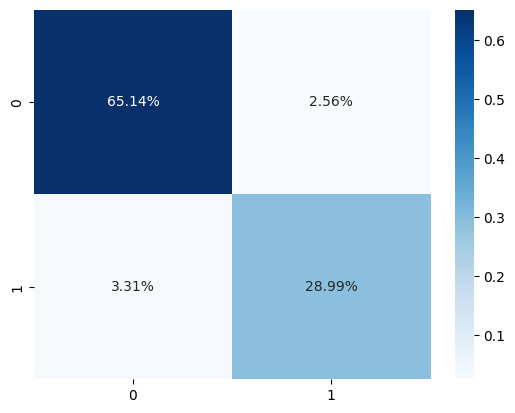

In [16]:
import seaborn as sns

cf_matrix = confusion_matrix(y_true, y_preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')